#### Logarithm Transformation

In [1]:
import numpy as np
import pandas as pd

# for ploting 
import matplotlib.pyplot as plt

# for q-q plots
import scipy.stats as stats

# dataset
from sklearn.datasets import fetch_california_housing


In [2]:
#load the dataset form scikit-learn
X,y = fetch_california_housing(return_X_y=True,as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


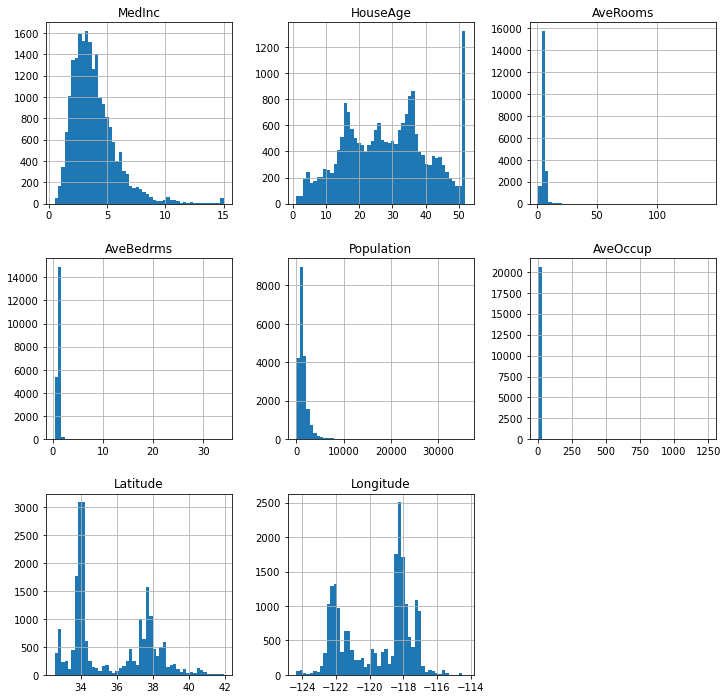

In [4]:
# plot histogram to inspect variable distribution
X.hist(bins=50,figsize=(12,12))
plt.show()

In [5]:
# Plot histogram and Q-Q plots to explore the variable distribution

def diagnostic_plots(df,variable):
    plt.figure(figsize=(15,6))
    
    #histogram
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    plt.title(f'Histogram of {variable}')
    
    # q-q plots
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    plt.title(f'Q-Q plot of {variable}')
    
    plt.show()

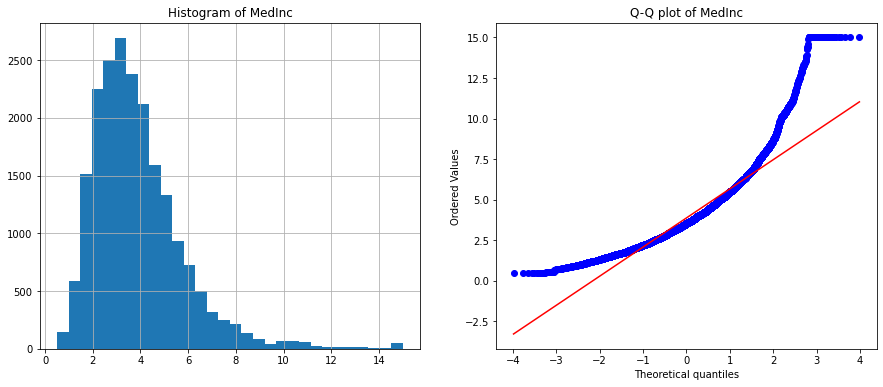

In [6]:
diagnostic_plots(X,'MedInc')

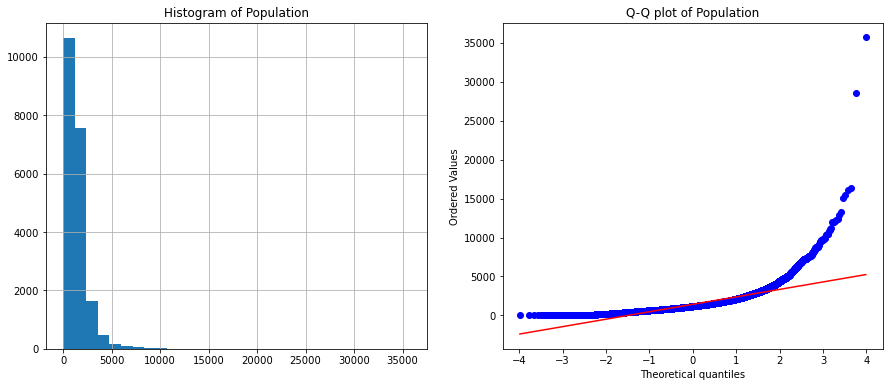

In [7]:
diagnostic_plots(X, "Population")

#### Logarithmic transformation with NumPy

In [8]:
# make copy
x_tf = X.copy()

In [9]:
# list with the variables to transform
variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]



In [11]:
#apply log to set of varible
x_tf[variables] = np.log(X[variables])

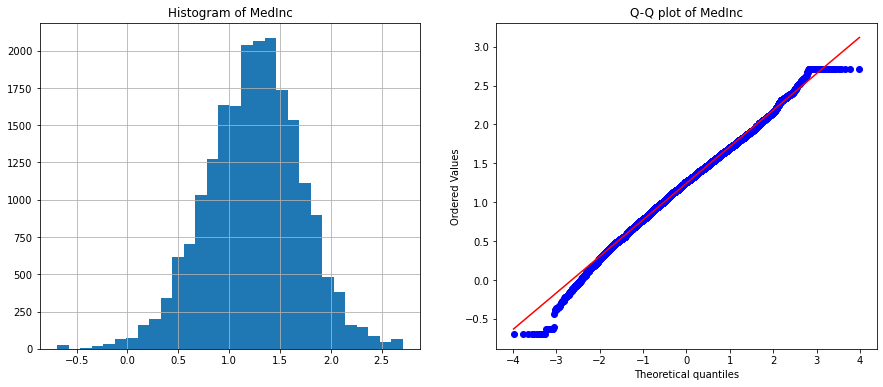

In [12]:
diagnostic_plots(x_tf,"MedInc")

#### Logarithm plus constant

In [13]:


# make a copy of original data

X_tf = X.copy()



In [14]:
X_tf[variables] = np.log(X[variables] + 1)

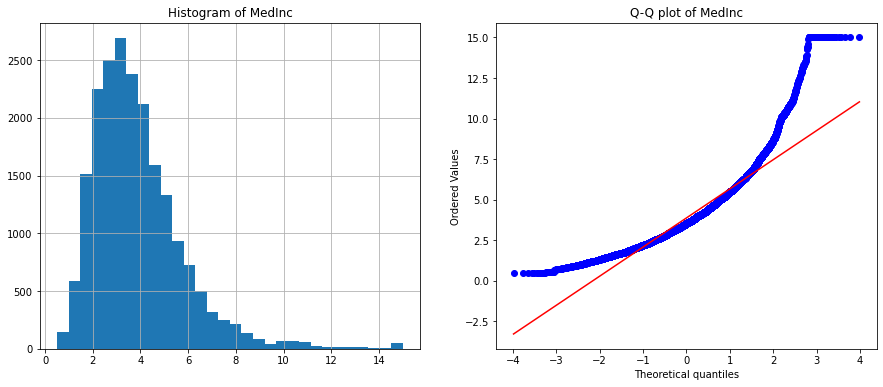

In [15]:
diagnostic_plots(X_tf,"MedInc")

## Sklearn: Logarithmic-transformation

In [16]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import FunctionTransformer

In [17]:
X,y = fetch_california_housing(return_X_y=True,as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
#plot histogram and Q-Q plots to show variable distributin

def diagnostic_plots(df,variable):
    plt.figure(figsize=(15,6))
    
    
    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

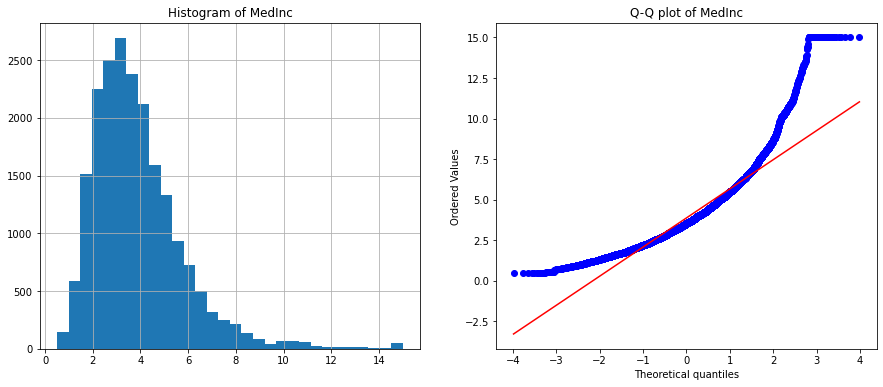

In [20]:
diagnostic_plots(X,'MedInc')

#### Logarithmic transformation with Scikit-learn

In [21]:
X_tf = X.copy()

In [23]:
# set up the transformer with NumPy log as parameter

transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)



In [24]:
# transform subset of dataframe
X_tf[variables ] = transformer.transform(X[variables])

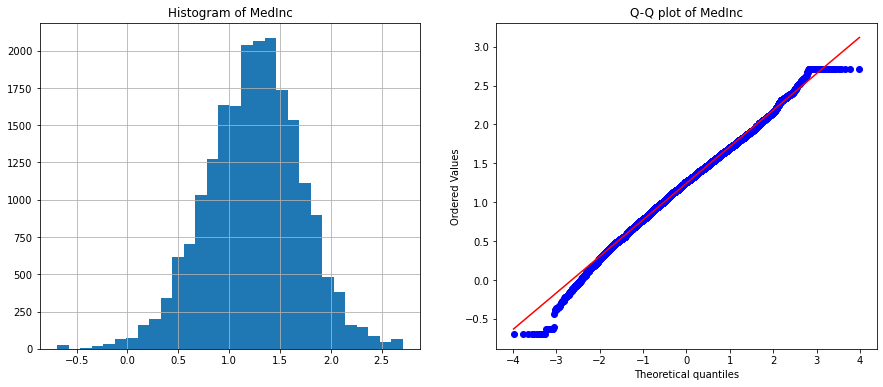

In [25]:
diagnostic_plots(X_tf,'MedInc')

In [27]:
#Logarithm plus constant
#If you want to add a constant to the variables, say because some of their values are 0 or negative, this is how to do it.

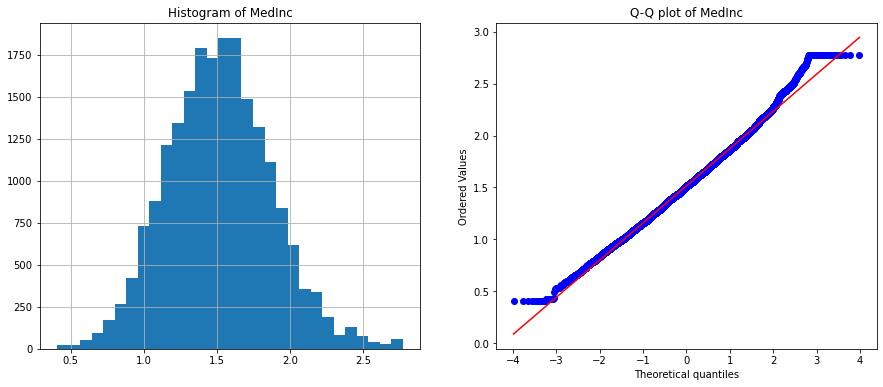

In [28]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

# set up the transformer

transformer = FunctionTransformer(lambda x: np.log(x + 1))

# transform subset of dataframe

X_tf[variables] = transformer.transform(X[variables])

# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")


# Feature Engine

In [30]:
# Logarithm transformation

In [32]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

from feature_engine.transformation import LogTransformer
from feature_engine.transformation import LogCpTransformer

In [33]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


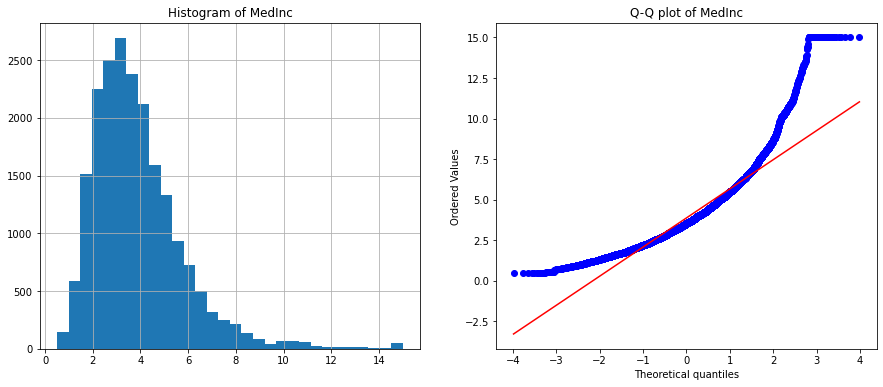

In [34]:
# Plot histogram and Q-Q plots to explore the variable distribution


def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

# Check function output

diagnostic_plots(X, "MedInc")



#### Logarithmic transformation with Feature-engine

In [35]:
variables = ['MedInc','AveRooms','AveBedrms','Population']


In [36]:
#set up  for transformer
lt = LogTransformer(variables=variables)

# fit transformer
lt.fit(X)

LogTransformer(variables=['MedInc', 'AveRooms', 'AveBedrms', 'Population'])

In [37]:
lt.variables_

['MedInc', 'AveRooms', 'AveBedrms', 'Population']

In [38]:
X_tf = lt.transform(X)

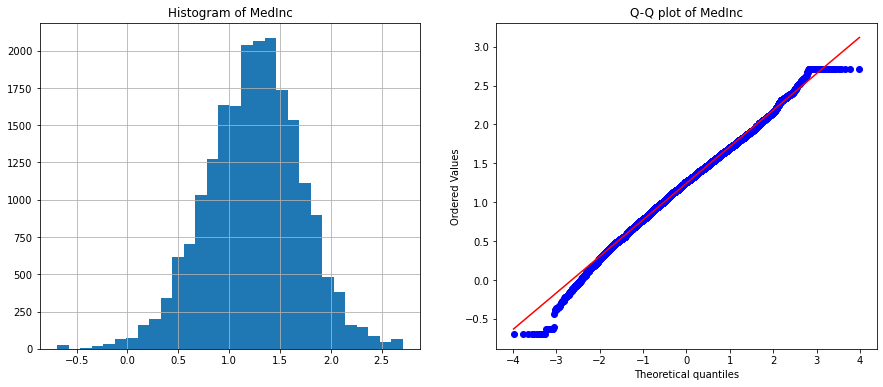

In [39]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")

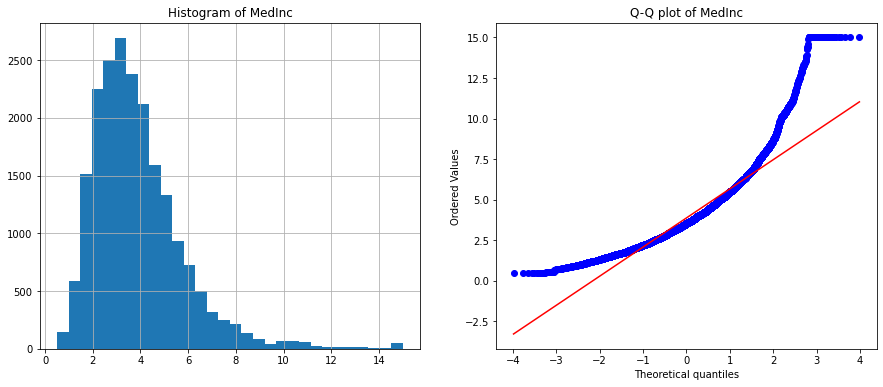

In [40]:
# revert to the original representation

X_tf = lt.inverse_transform(X_tf)

diagnostic_plots(X_tf, "MedInc")


In [41]:
# Logarithm plus constant

In [42]:
# set up the transformer to find the minimum value per
# variable, automatically.

lt = LogCpTransformer(variables=variables, C="auto")

# fit transformer to data set
lt.fit(X)

# the constant that will be added
lt.C_

{'MedInc': 1.4999,
 'AveRooms': 1.8461538461538463,
 'AveBedrms': 1.3333333333333333,
 'Population': 4.0}

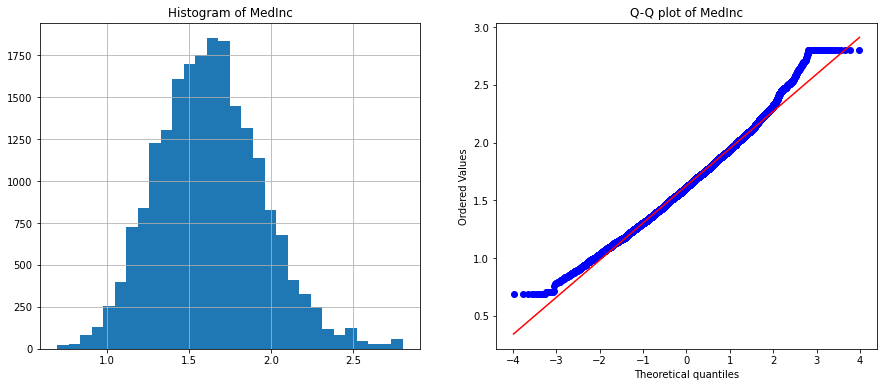

In [43]:
# transform variables in our data set

X_tf = lt.transform(X)

# use diagnostic plot function to address variable transformation

diagnostic_plots(X_tf, "MedInc")

#### Arcsin-transformation

In [44]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# dataset for the demo
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# with open_source packages
from sklearn.preprocessing import FunctionTransformer

In [45]:
#load dataset
breast_cancer = load_breast_cancer()


#Load dataset
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

X.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [47]:
variables = [
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst symmetry',
  'worst fractal dimension']


In [48]:
# make a copy of the data

train_t = X_train.copy()
test_t = X_test.copy()

In [49]:
# set up transformer with desired operation

tf = FunctionTransformer(func=lambda x: np.arcsin(np.sqrt(x)))

tf.set_output(transform="pandas")


/home/zahoor/.local/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


FunctionTransformer(func=<function <lambda> at 0x7fccba065e10>)

In [50]:
# transform the data
train_t[variables] = tf.transform(X_train[variables])
test_t[variables] = tf.transform(X_test[variables])


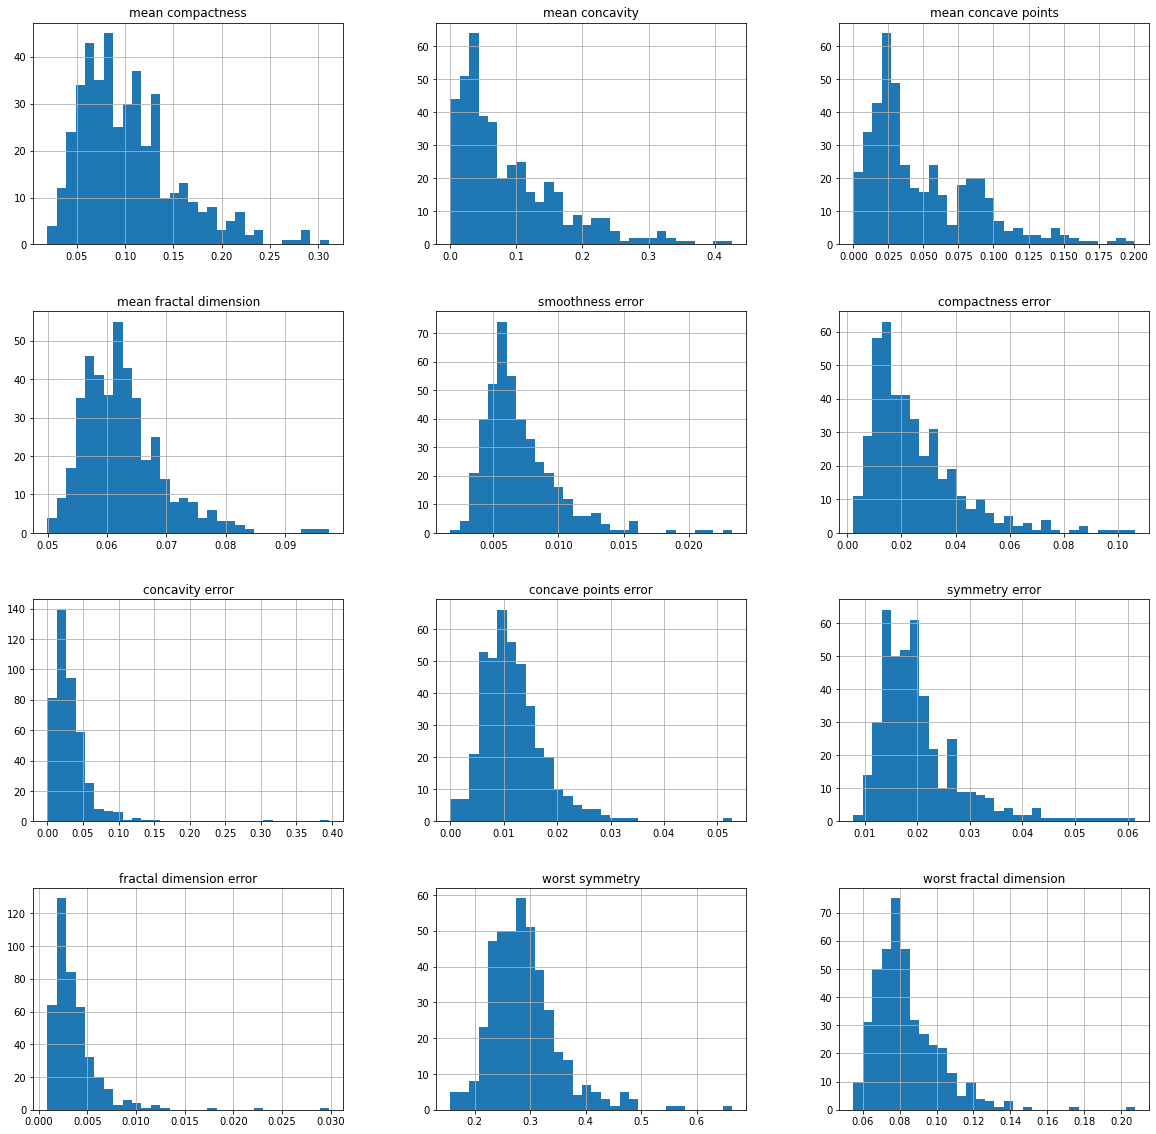

In [51]:
# original variable
X_train[variables].hist(figsize=(20,20),bins=30)
plt.show()

array([[<AxesSubplot:title={'center':'mean compactness'}>,
        <AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>],
       [<AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'smoothness error'}>,
        <AxesSubplot:title={'center':'compactness error'}>],
       [<AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:title={'center':'concave points error'}>,
        <AxesSubplot:title={'center':'symmetry error'}>],
       [<AxesSubplot:title={'center':'fractal dimension error'}>,
        <AxesSubplot:title={'center':'worst symmetry'}>,
        <AxesSubplot:title={'center':'worst fractal dimension'}>]],
      dtype=object)

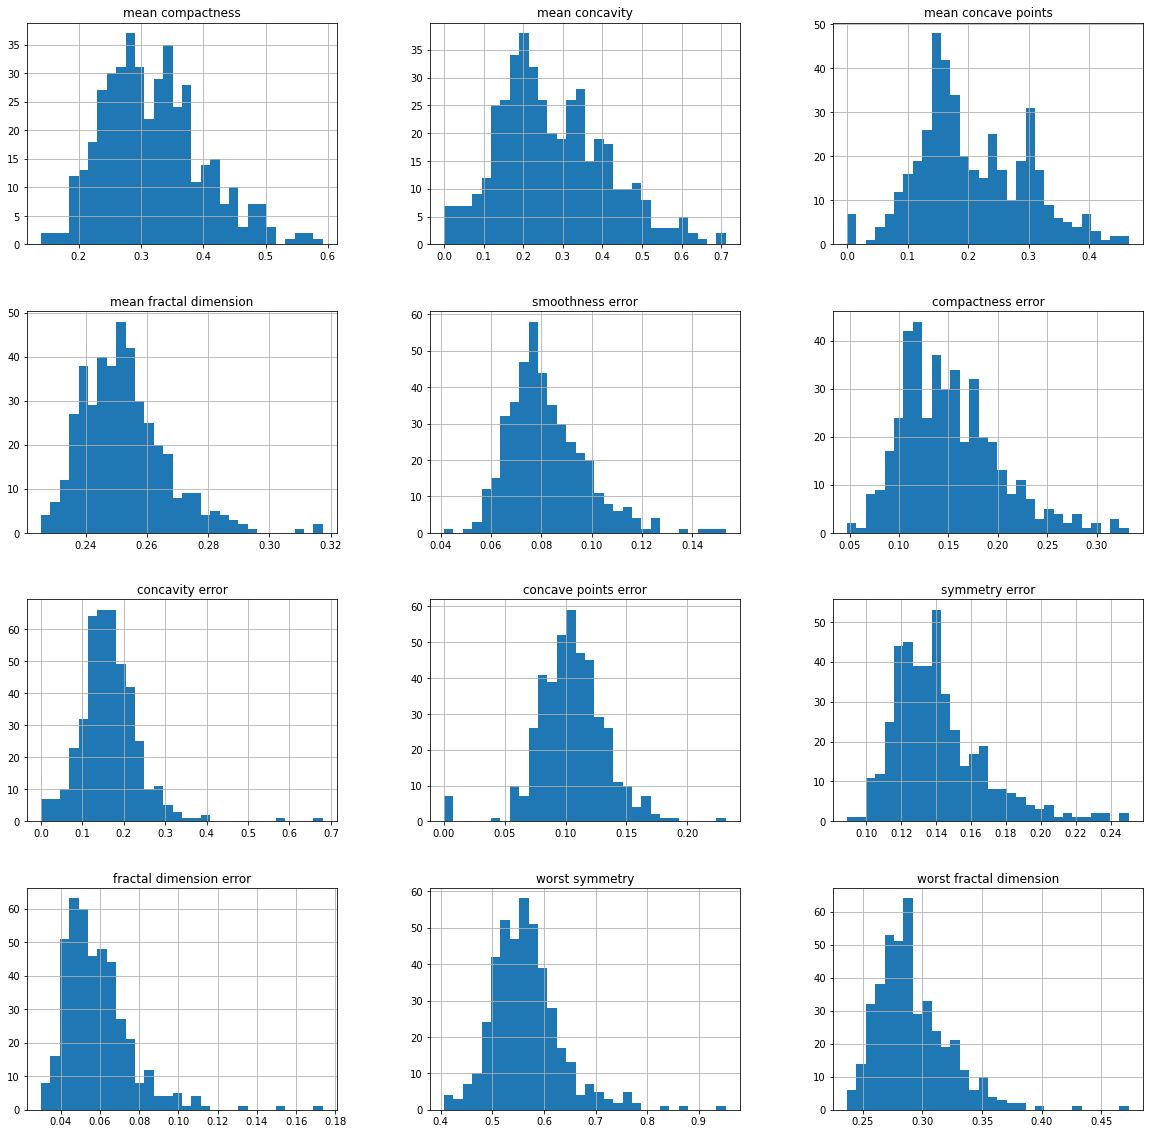

In [52]:
train_t[variables].hist(figsize=(20,20),bins=30)